In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Problem statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. 

It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 

Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [2]:
#importing or loading the dataset
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The dataset has 11 input feature columns as following:
    
1) 'PassengerId': ID number of passenger, will not help in prediction of survival. So may drop off this column.

2) 'Pclass': Passenger class

3) 'Name': Name of passenger, will not help in prediction of survival. So may drop off this column.

4) 'Sex': Gender of passenger

5) 'Age': Age of passenger

6) 'SibSp': Number of Siblings or Spouses Aboard

7) 'Parch': Number of Siblings or Spouses Aboard

8) 'Ticket': Ticket number

9) 'Fare': Ticket fare

10) 'Cabin' : Cabin number

11) 'Embarked': Port of Embarkation (C = Cherbourg, Q = Queenstown,S = Southampton)

Target is 'Survived' is of categrical (Binary) in nature

In [3]:
#Checking data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
#Checking general information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Checkin for data shape
df.shape

(891, 12)

In [6]:
#Checking any null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

age has 177 null values, which need to be handled

Cabin has 687 null values

In [7]:
#Checking any blank or white spaces
np.where(df.applymap(lambda x: x == ' '))

(array([], dtype=int64), array([], dtype=int64))

In [8]:
#Checking if all entries of a column is unique or not

#PassengerId column
for i in df.columns:
    print('For column of {} '.format(i),(len(df[i].unique())==len(df[i])))

For column of PassengerId  True
For column of Survived  False
For column of Pclass  False
For column of Name  True
For column of Sex  False
For column of Age  False
For column of SibSp  False
For column of Parch  False
For column of Ticket  False
For column of Fare  False
For column of Cabin  False
For column of Embarked  False


Passenger ID and Name columns has unique values anddata will not help in survival prediction so we may drop off these columns

In [9]:
df = df.drop(['PassengerId','Name'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#Checking of value counts in each columns

for i in df.columns:
    print(df[i].value_counts(),'\n')

0    549
1    342
Name: Survived, dtype: int64 

3    491
1    216
2    184
Name: Pclass, dtype: int64 

male      577
female    314
Name: Sex, dtype: int64 

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64 

1601        7
CA. 2343    7
347082      7
347088      6
3101295     6
           ..
345770      1
PC 17318    1
28665       1
113503      1
349221      1
Name: Ticket, Length: 681, dtype: int64 

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64 

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F2             3
              

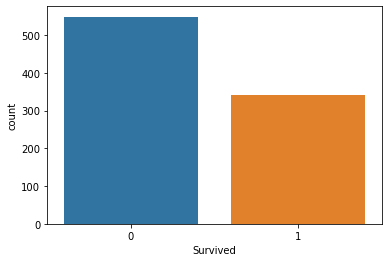

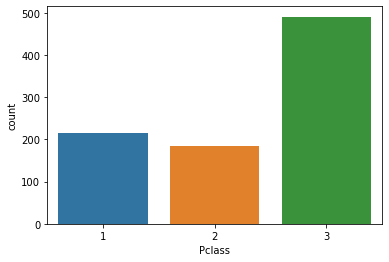

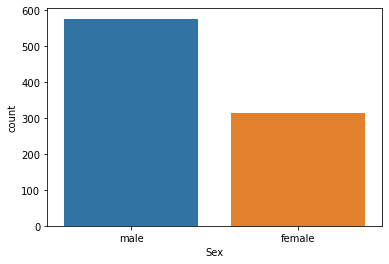

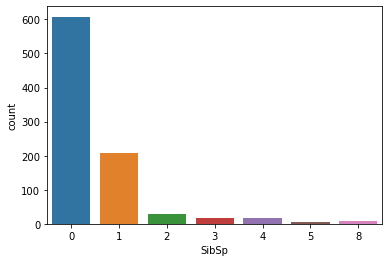

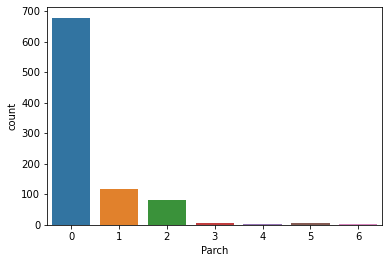

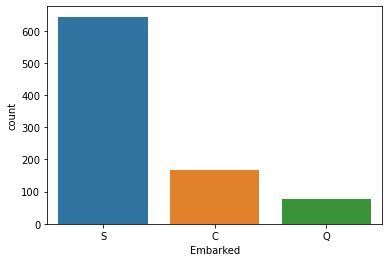

In [11]:
#Vizualization of value counts in each categorical columns
dfcat = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']
for i in dfcat:
    sns.countplot(df[i])
    plt.show()

If we observe target variable, data distribution is 550/350 almost balanced

There are 3 classes of passengers

There are 3 ports of embaration

There are 8 categories in SIBSP (siblings or spouse aboard)

There are 6 categories in PARCH (parents or children aboard)

In [12]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

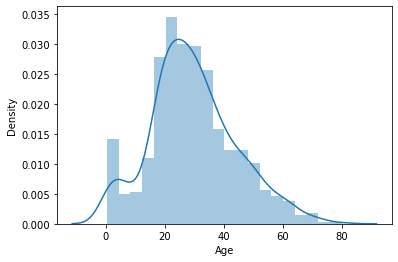

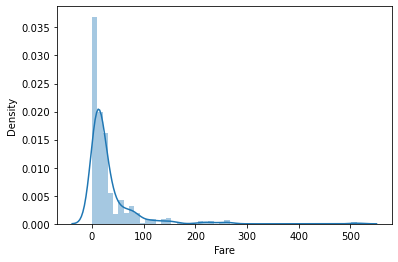

In [13]:
#Vizualization of distribution of numerical or continuous data
dfnum = ['Age', 'Fare']
for i in dfnum:
    sns.distplot(df[i])
    plt.show()

We can observe Age data is normally distributed but little bit right skewed

Fare distribution is highly right skewed

In [14]:
#Cabin column has most of the values as NAN entries, so we shal omit this column
df = df.drop('Cabin', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [15]:
#Also we shall drop Ticket column as it has no role in survival prediction
df = df.drop('Ticket', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


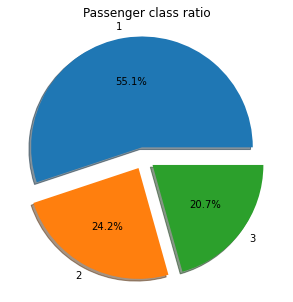

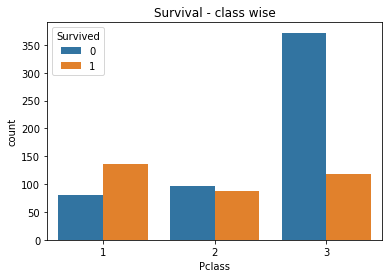

In [16]:
#Let us do individual column analysis wrt other or target column

var = 'Pclass'
plt.figure(figsize=(5,5))
data = list(df[var].value_counts())
plt.pie(data, labels= list(set(df[var].values)), autopct='%1.1f%%', explode=[0.1,0.1,0.1], shadow=True)
plt.axis('equal')
plt.title('Passenger class ratio')
plt.show()

#for proper understanding let us visualize passenger class among survivors
sns.countplot(hue = df['Survived'], x = df[var])
plt.title('Survival - class wise')
plt.show()

We can observe that more number of passengers didnot survived in class 3

Number passengers survived in class 1 is little high compared to other 2 classes 

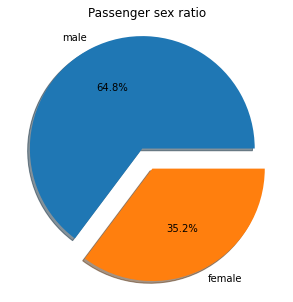

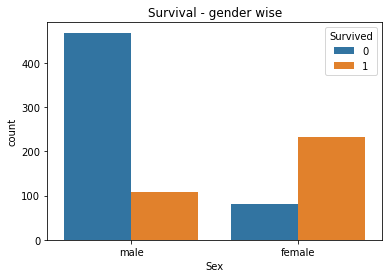

In [17]:
#Let us do individual column analysis wrt other or target column

var = 'Sex'
plt.figure(figsize=(5,5))
data = list(df[var].value_counts())
plt.pie(data, labels= list(set(df[var].values)), autopct='%1.1f%%', explode=[0.1,0.1], shadow=True)
plt.axis('equal')
plt.title('Passenger sex ratio')
plt.show()

#for proper understanding let us visualize gender among survivors
sns.countplot(hue = df['Survived'], x = df[var])
plt.title('Survival - gender wise')
plt.show()

We can observe that more number of male passengers didnot survived compared to female pasengers

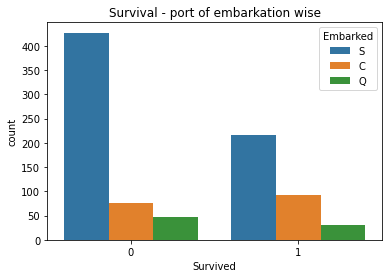

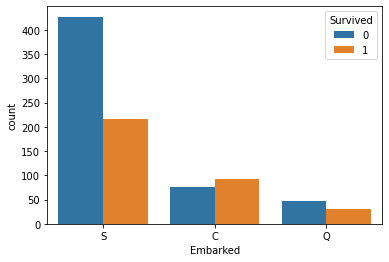

In [18]:
#for proper understanding let us visualize port of embarkation among survivors
sns.countplot(x = df['Survived'], hue = df['Embarked'])
plt.title('Survival - port of embarkation wise')
plt.show()

#On-boarded place vs survived or not
sns.countplot( x = df['Embarked'], hue = df['Survived'])
plt.show()

Number of passenger survived are in order S>C>Q as per port of embarkation

Also number of passenger didnot survived are in order S>C>Q as per port of embarkation, following same trend

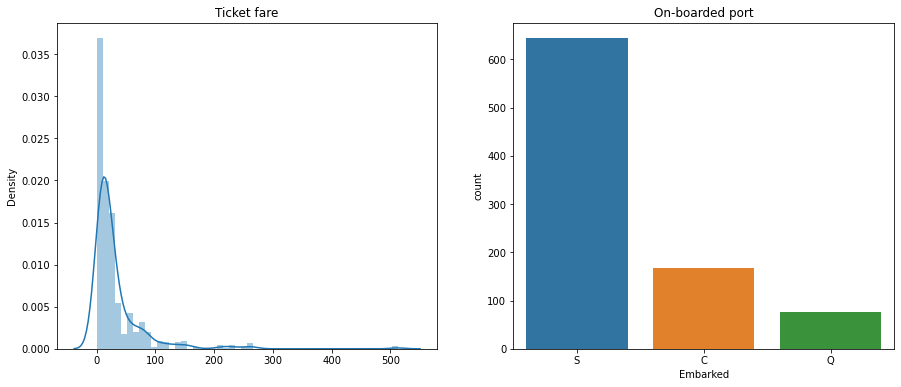

In [19]:
#Visualization of data
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

#Fare
sns.distplot(ax=axes[0], x = df['Fare'])
plt.xlabel('Ticket fare')
axes[0].set_title('Ticket fare')

#On-boarded place
sns.countplot(ax=axes[1], x = df['Embarked'])
axes[1].set_title('On-boarded port')
plt.show()

We can observe one more thing, Ticket fare is having relation with port of embarkation

#Handling nan values in age and embarked columns

In [20]:
#Age
df['Age'].fillna(df['Age'].mean(), inplace=True)

#Embarked
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [21]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
#Encoding of categorical data
df = df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


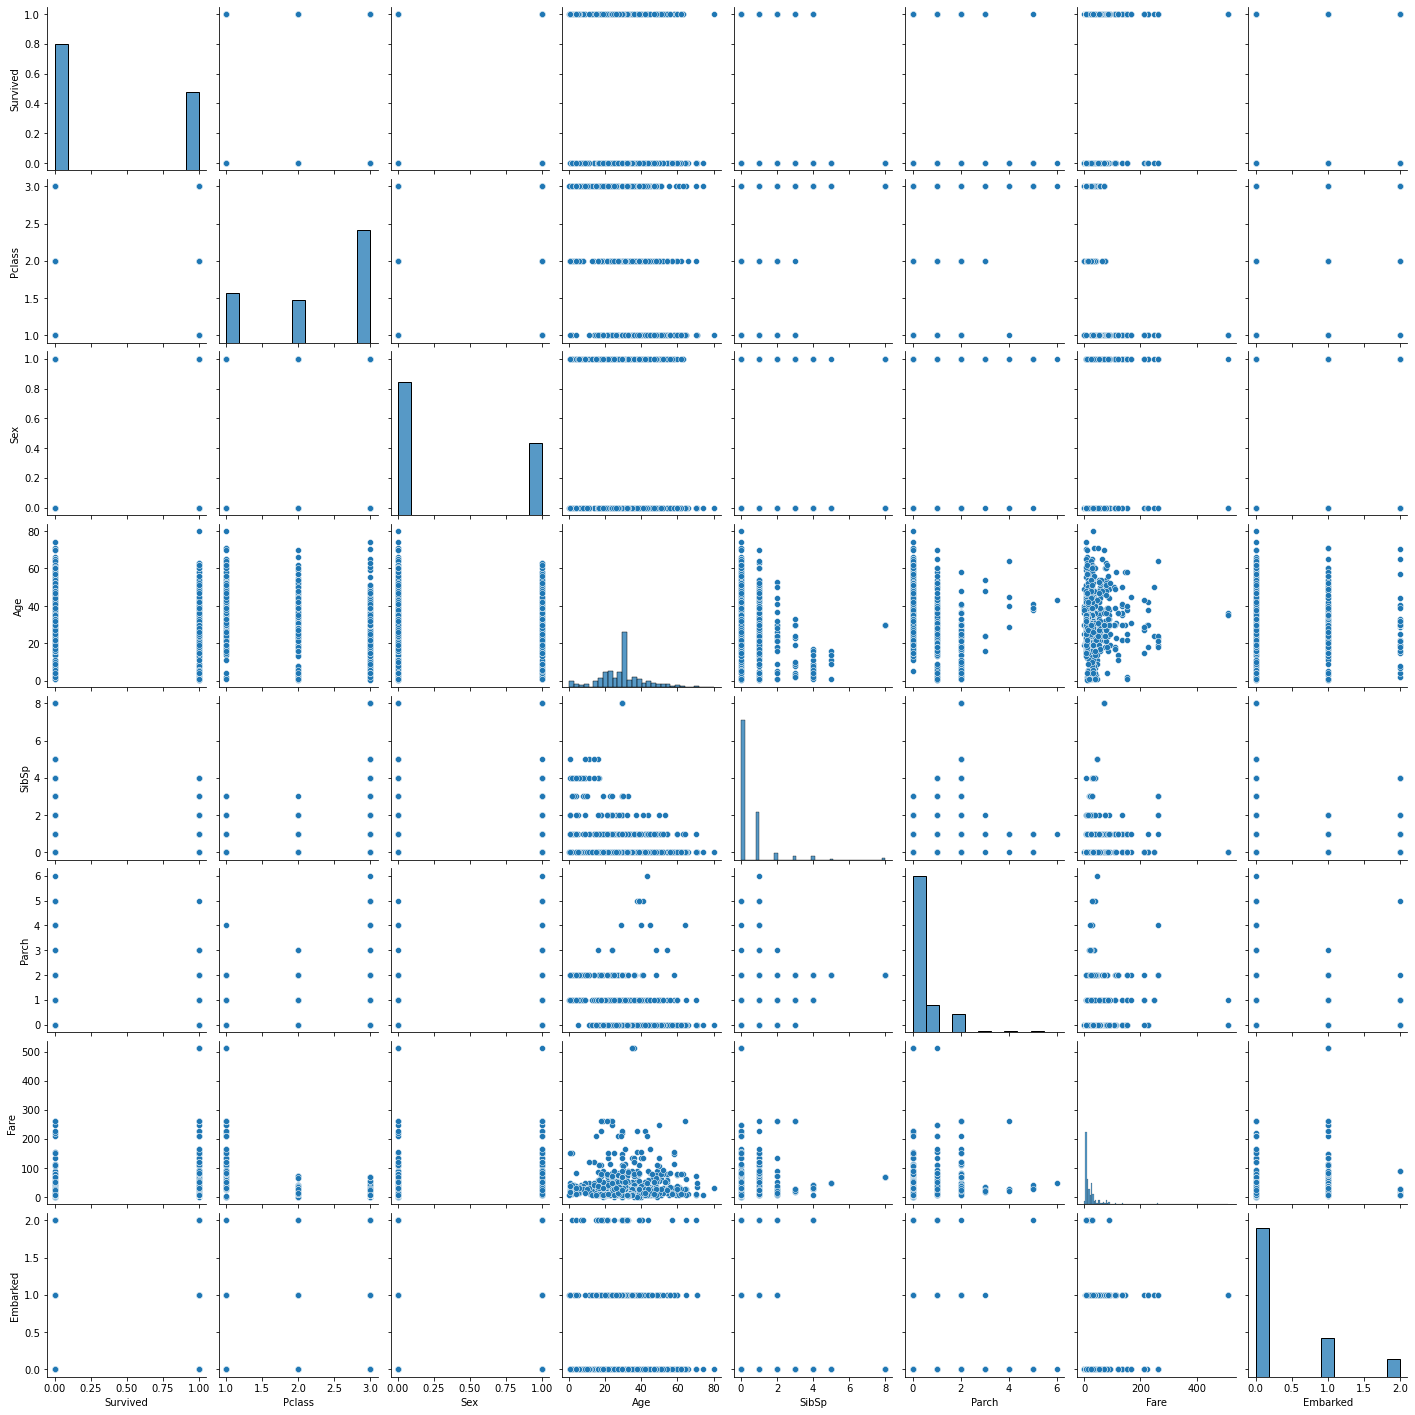

In [23]:
#Plotting all possible bivariate plots together
sns.pairplot(df)
plt.show()

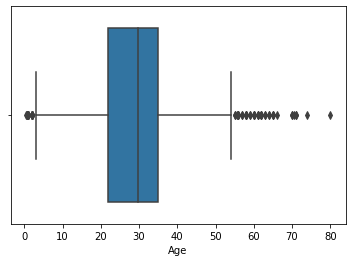

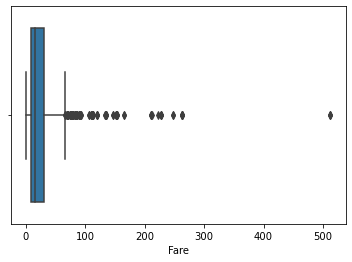

In [24]:
#Checking outliers in the input continuous data
sns.boxplot(df['Age'])
plt.xlabel('Age')
plt.show()

sns.boxplot(df['Fare'])
plt.xlabel('Fare')
plt.show()

Both age and Fare columns has outliers which has to be removed before training the model

In [25]:
#Statistical summary of the data
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Concentrate on continuous features fare and age:

We can observe here Fare std value is more than its mean value, having highly skewed data

In [26]:
#Coefficient of correlation matrix
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


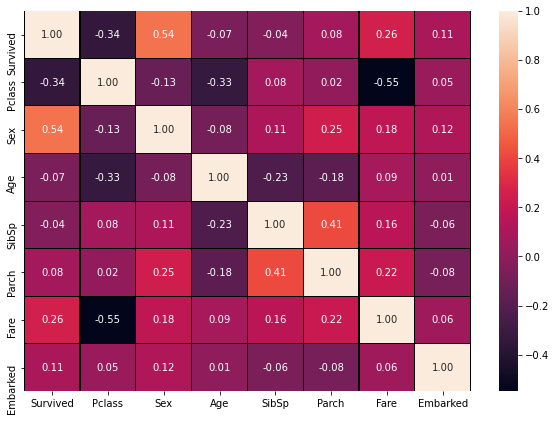

Survived    1.000000
Sex         0.543351
Fare        0.257307
Embarked    0.106811
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64

In [27]:
#Heatmap to vizualize correlation between different features
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

#Sorting descending values of correlation data of target variable
df.corr()['Survived'].sort_values(ascending=False)

We can observe that there is no multicollinearity problem

Survival +ve correlated with Sex with +.54 r value

Survival +ve correlated with Pclass with -.33 r value

Continuous variables Fare and Age:

Fare 0.257307

Age -0.069809

In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [29]:
#Removing of outliers by zscore method
print('Shape before',df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]
print('Shape after',df_new.shape,'\n')

#Percentage loss of data
loss = (df.shape[0]-df_new.shape[0])*100/(df.shape[0])
print(loss,'% loss of data')

Shape before (891, 8)
Shape after (820, 8) 

7.968574635241302 % loss of data


In [30]:
#Seperate feature and target columns
x = df_new.drop('Survived', axis=1)
y = df_new['Survived']
print('x shape',x.shape)
print('y shape',y.shape)

x shape (820, 7)
y shape (820,)


In [31]:
#Checking skewness of continuous feature data columns
x[['Age', 'Fare']].skew()

Age     0.318314
Fare    2.318761
dtype: float64

skewness of Fare column is not in permissible range i.e, +-0.5

In [32]:
#Apply power transform to transform data
from sklearn.preprocessing import PowerTransformer
po = PowerTransformer()
x_new = po.fit_transform(x)
x_new = pd.DataFrame(x_new, columns=x.columns)
x_new[['Age', 'Fare']].skew()

Age     0.071813
Fare   -0.018602
dtype: float64

Skewness of continuous feature column is within limit (+-0.5) so we can proceed

In [33]:
x = x_new

In [34]:
#Checking whether data is balanced or imbalanced
y.value_counts()

0    500
1    320
Name: Survived, dtype: int64

Target class column is not an imbalanced data (7:3 to be considered as imbalanced data)

So no sampling/balancing required

In [35]:
#VIF method to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

[2.021375294373982,
 1.1483084816020754,
 1.2314420569162863,
 1.3224837583438702,
 1.3266018125915537,
 2.368589675208563,
 1.0386191754126988]

VIF values are within limit <5, so no need to handle multicollinearity issue

In [36]:
#scaling of input feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score

In [38]:
#Best randm state selection
max_acc = 0
max_RS = 0

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

for i in range(1,300):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr, ytr)
    predyt = lr.predict(xt)
    accuracy = accuracy_score(yt,predyt)
    
    if accuracy > max_acc:
        max_acc = accuracy
        max_RS = i
        print('At Max RS',i,'Max Accuracy =',accuracy)

At Max RS 1 Max Accuracy = 0.8048780487804879
At Max RS 4 Max Accuracy = 0.8170731707317073
At Max RS 14 Max Accuracy = 0.8658536585365854
At Max RS 201 Max Accuracy = 0.8719512195121951


In [189]:
#Using best random state for train test split
xtr, xt, ytr, yt = train_test_split(x,y, random_state=201,test_size=0.2)

In [190]:
def metric_score(model, xtr, xt, ytr, yt, train=True):
    if train:
        ypr = model.predict(xtr)
        print(f"Accuracy score of train is : {(accuracy_score(ytr, ypr))*100:.2f}%")
        
    elif train==False:
        ypr = model.predict(xt)
        print(f"Accuracy score of test is : {(accuracy_score(yt, ypr))*100:.2f}%",'\n\nClassification report:')
        print(classification_report(yt, ypr))

In [191]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 77.44%
Accuracy score of test is : 87.20% 

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       107
           1       0.85      0.77      0.81        57

    accuracy                           0.87       164
   macro avg       0.87      0.85      0.86       164
weighted avg       0.87      0.87      0.87       164



In [192]:
ypr = model.predict(xt) 
print('Accuracy score:',accuracy_score(yt, ypr),'\n')

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean())

Accuracy score: 0.8719512195121951 

At CV = 2
CV score = 0.7890243902439025
At CV = 3
CV score = 0.7926837963334314
At CV = 4
CV score = 0.7951219512195122
At CV = 5
CV score = 0.7951219512195122
At CV = 6
CV score = 0.7890367825962502
At CV = 7
CV score = 0.7951304815711594
At CV = 8
CV score = 0.7939153816866553
At CV = 9
CV score = 0.7939029569464352
At CV = 10
CV score = 0.7914634146341463


At CV = 4, there is huge difference between accuracy score and CV score (0.0768). The model is overfitting.

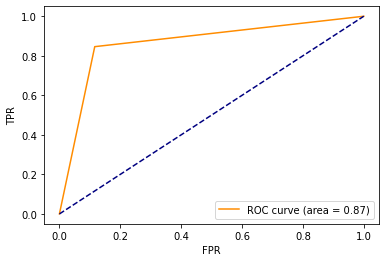

Confusion matrix:
 [[99  8]
 [13 44]] 

Area under curve = 0.8650412087912088


In [196]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()

print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

In [200]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 98.02%
Accuracy score of test is : 82.93% 

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.75      0.77      0.76        57

    accuracy                           0.83       164
   macro avg       0.81      0.82      0.81       164
weighted avg       0.83      0.83      0.83       164



There is huge difference between train and test acuuracy

Let us check CV for overfitting

In [201]:
ypr = model.predict(xt) 
print('Accuracy score:',accuracy_score(yt, ypr),'\n')

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean())

Accuracy score: 0.8292682926829268 

At CV = 2
CV score = 0.7524390243902439
At CV = 3
CV score = 0.761004607719936
At CV = 4
CV score = 0.7585365853658537
At CV = 5
CV score = 0.7573170731707318
At CV = 6
CV score = 0.7658508658938028
At CV = 7
CV score = 0.753719914736864
At CV = 8
CV score = 0.7622905958499905
At CV = 9
CV score = 0.7646918299092212
At CV = 10
CV score = 0.7597560975609756


At CV = 6, there is difference between accuracy score and CV score (0.0634). But this difference value is lesser compared to Logistic regression. 

So lets try hyper parameter tuning and check again.

In [206]:
# Hyper parameter tuning for decision tree model
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':["gini", "entropy"],
              'splitter':["best", "random"],
              'max_depth':[2,4,6,8],
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       splitter='random')


In [207]:
#Training model as per best parameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',splitter='random')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 82.93%
Accuracy score of test is : 82.32% 

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.88       107
           1       0.89      0.56      0.69        57

    accuracy                           0.82       164
   macro avg       0.85      0.76      0.78       164
weighted avg       0.83      0.82      0.81       164



In [208]:
ypr = model.predict(xt) 
print('Accuracy score:',accuracy_score(yt, ypr),'\n')

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean())

Accuracy score: 0.823170731707317 

At CV = 2
CV score = 0.7670731707317073
At CV = 3
CV score = 0.769507054178587
At CV = 4
CV score = 0.8048780487804879
At CV = 5
CV score = 0.7817073170731706
At CV = 6
CV score = 0.7878470731358237
At CV = 7
CV score = 0.7708242792988556
At CV = 8
CV score = 0.7962949743003997
At CV = 9
CV score = 0.765806657111005
At CV = 10
CV score = 0.7780487804878049


At CV = 4, difference between CV score and accuracy score is 0.018

Model is not that much overfitting compared to previous LR and untuned DTC model

Therefore model performance is good comparitively

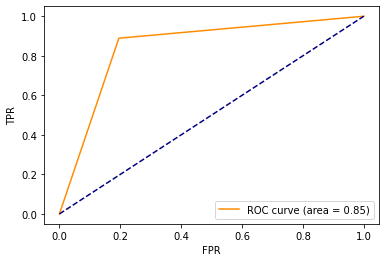

Confusion matrix:
 [[103   4]
 [ 25  32]] 

Area under curve = 0.8467881944444444


In [209]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()

print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

In [212]:
#Support vector machine classifier
from sklearn.svm import SVC
model = SVC()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 81.55%
Accuracy score of test is : 88.41% 

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       107
           1       0.93      0.72      0.81        57

    accuracy                           0.88       164
   macro avg       0.90      0.85      0.86       164
weighted avg       0.89      0.88      0.88       164



In [213]:
ypr = model.predict(xt) 
print('Accuracy score:',accuracy_score(yt, ypr),'\n')

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean())

Accuracy score: 0.8841463414634146 

At CV = 2
CV score = 0.8134146341463415
At CV = 3
CV score = 0.8146529058937818
At CV = 4
CV score = 0.8146341463414635
At CV = 5
CV score = 0.8170731707317074
At CV = 6
CV score = 0.8122405896665237
At CV = 7
CV score = 0.8159081972641294
At CV = 8
CV score = 0.8097753664572624
At CV = 9
CV score = 0.8073339703774487
At CV = 10
CV score = 0.8121951219512196


At CV = 5, difference between CV score and accuracy score is 0.067

In [214]:
# Hyper parameter tuning for svc model
from sklearn.model_selection import GridSearchCV
parameters = {'gamma':['scale', 'auto'],
              'max_iter':range(0,200,10),
              'kernel':["linear", "poly", "rbf"],
              'tol':[0.0001,0.001,0.01]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

SVC(max_iter=130, tol=0.0001)


In [215]:
#Training model as per best parameters
model = SVC(max_iter=130, tol=0.0001)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 82.77%
Accuracy score of test is : 85.37% 

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       107
           1       0.85      0.70      0.77        57

    accuracy                           0.85       164
   macro avg       0.85      0.82      0.83       164
weighted avg       0.85      0.85      0.85       164



In [216]:
ypr = model.predict(xt) 
print('Accuracy score:',accuracy_score(yt, ypr),'\n')

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean())

Accuracy score: 0.8536585365853658 

At CV = 2
CV score = 0.8121951219512196
At CV = 3
CV score = 0.8122198158694509
At CV = 4
CV score = 0.8121951219512196
At CV = 5
CV score = 0.8085365853658537
At CV = 6
CV score = 0.7890457277801631
At CV = 7
CV score = 0.8097928436911487
At CV = 8
CV score = 0.7951051779935274
At CV = 9
CV score = 0.7939162286988375
At CV = 10
CV score = 0.7926829268292683


At CV = 3, difference between accuracy score and CV score is 0.041

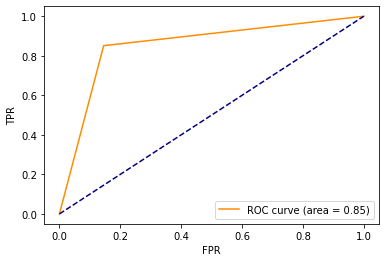

Confusion matrix:
 [[100   7]
 [ 17  40]] 

Area under curve = 0.8528823422440442


In [217]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()

print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

In [220]:
#K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 84.15%
Accuracy score of test is : 86.59% 

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       107
           1       0.84      0.75      0.80        57

    accuracy                           0.87       164
   macro avg       0.86      0.84      0.85       164
weighted avg       0.86      0.87      0.86       164



In [221]:
ypr = model.predict(xt) 
print('Accuracy score:',accuracy_score(yt, ypr),'\n')

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean())

Accuracy score: 0.8658536585365854 

At CV = 2
CV score = 0.7804878048780488
At CV = 3
CV score = 0.7902729873532793
At CV = 4
CV score = 0.8158536585365854
At CV = 5
CV score = 0.8146341463414635
At CV = 6
CV score = 0.8061310290539573
At CV = 7
CV score = 0.8158978497961549
At CV = 8
CV score = 0.8134518370454977
At CV = 9
CV score = 0.8146732494558582
At CV = 10
CV score = 0.8134146341463415


At CV = 7, difference between CV score and accuracy score is 0.05

In [222]:
# Hyper parameter tuning for KNN model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_neighbors':range(5,15), 
              'weights':['uniform','distance'], 
              'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'leaf_size':[25,30,35]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

KNeighborsClassifier(leaf_size=25, n_neighbors=6)


In [223]:
#Training model as per best parameters
model = KNeighborsClassifier(leaf_size=25, n_neighbors=6)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 82.93%
Accuracy score of test is : 87.80% 

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       107
           1       0.93      0.70      0.80        57

    accuracy                           0.88       164
   macro avg       0.89      0.84      0.86       164
weighted avg       0.88      0.88      0.87       164



In [224]:
ypr = model.predict(xt) 
print('Accuracy score:',accuracy_score(yt, ypr),'\n')

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean())

Accuracy score: 0.8780487804878049 

At CV = 2
CV score = 0.7878048780487805
At CV = 3
CV score = 0.7975945384704509
At CV = 4
CV score = 0.8146341463414634
At CV = 5
CV score = 0.8134146341463415
At CV = 6
CV score = 0.8109972091026192
At CV = 7
CV score = 0.8158771548602056
At CV = 8
CV score = 0.8159028174376546
At CV = 9
CV score = 0.8256357169400647
At CV = 10
CV score = 0.8170731707317074


At CV = 9, difference between CV score and accuracy score is 0.052

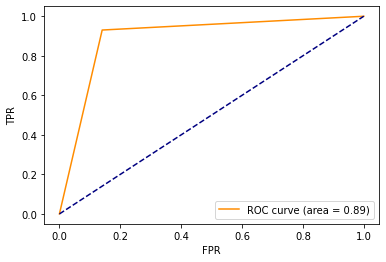

Confusion matrix:
 [[104   3]
 [ 17  40]] 

Area under curve = 0.8948683451854699


In [225]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()

print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

In [227]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 82.01%
Accuracy score of test is : 87.20% 

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       107
           1       0.83      0.79      0.81        57

    accuracy                           0.87       164
   macro avg       0.86      0.85      0.86       164
weighted avg       0.87      0.87      0.87       164



In [228]:
ypr = model.predict(xt) 
print('Accuracy score:',accuracy_score(yt, ypr),'\n')

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean())

Accuracy score: 0.8719512195121951 

At CV = 2
CV score = 0.7865853658536586
At CV = 3
CV score = 0.7817482598504496
At CV = 4
CV score = 0.8
At CV = 5
CV score = 0.7963414634146342
At CV = 6
CV score = 0.7927400887362244
At CV = 7
CV score = 0.8085925374060966
At CV = 8
CV score = 0.8110127546164096
At CV = 9
CV score = 0.8024765089982482
At CV = 10
CV score = 0.7951219512195122


At CV = 8, difference between CV score and accuracy score is 0.069

In [229]:
# Hyper parameter tuning for adaboost model
from sklearn.model_selection import GridSearchCV
parameters = { 'algorithm':['SAMME', 'SAMME.R'], 
              'n_estimators':[25,30,50,60,75], 
              'learning_rate' :[0.1, 1, 10], 
              'random_state':[25,30,35,40,45]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=25,
                   random_state=25)


In [230]:
#Training model as per best parameters
model = AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=25,random_state=25)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 78.96%
Accuracy score of test is : 87.80% 

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       107
           1       0.89      0.74      0.81        57

    accuracy                           0.88       164
   macro avg       0.88      0.85      0.86       164
weighted avg       0.88      0.88      0.87       164



In [231]:
ypr = model.predict(xt) 
print('Accuracy score:',accuracy_score(yt, ypr),'\n')

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean())

Accuracy score: 0.8780487804878049 

At CV = 2
CV score = 0.7658536585365854
At CV = 3
CV score = 0.7793329946614618
At CV = 4
CV score = 0.7792682926829269
At CV = 5
CV score = 0.7890243902439025
At CV = 6
CV score = 0.7938940174609991
At CV = 7
CV score = 0.7951201341031849
At CV = 8
CV score = 0.7926898914905769
At CV = 9
CV score = 0.7987604183256357
At CV = 10
CV score = 0.7951219512195122


At CV = 9, difference between CV score and accuracy score is 0.083

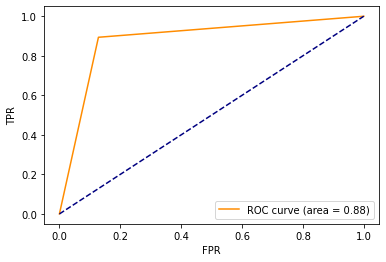

Confusion matrix:
 [[102   5]
 [ 15  42]] 

Area under curve = 0.8827059465357338


In [232]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()

print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

In [267]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 98.02%
Accuracy score of test is : 84.76% 

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       107
           1       0.80      0.75      0.77        57

    accuracy                           0.85       164
   macro avg       0.83      0.83      0.83       164
weighted avg       0.85      0.85      0.85       164



In [268]:
ypr = model.predict(xt) 
print('Accuracy score:',accuracy_score(yt, ypr),'\n')

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean())

Accuracy score: 0.8475609756097561 

At CV = 2
CV score = 0.7682926829268293
At CV = 3
CV score = 0.7951614484461199
At CV = 4
CV score = 0.7963414634146342
At CV = 5
CV score = 0.7926829268292683
At CV = 6
CV score = 0.7926774724488336
At CV = 7
CV score = 0.8061712299000435
At CV = 8
CV score = 0.8074195697696553
At CV = 9
CV score = 0.8073870573870573
At CV = 10
CV score = 0.8048780487804879


At CV = 8, difference between CV score and accuracy score is 0.04

In [270]:
# Hyper parameter tuning for random forest model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators':[100,125,150], 
              'criterion':["gini", "entropy"], 
              'max_depth' :[5, 10, 15], 
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=125)


In [271]:
#Training model as per best parameters
model = RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=125)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 93.75%
Accuracy score of test is : 88.41% 

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       107
           1       0.90      0.75      0.82        57

    accuracy                           0.88       164
   macro avg       0.89      0.85      0.87       164
weighted avg       0.89      0.88      0.88       164



In [272]:
ypr = model.predict(xt) 
print('Accuracy score:',accuracy_score(yt, ypr),'\n')

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean())

Accuracy score: 0.8841463414634146 

At CV = 2
CV score = 0.7951219512195122
At CV = 3
CV score = 0.8110077270661212
At CV = 4
CV score = 0.8207317073170731
At CV = 5
CV score = 0.8256097560975612
At CV = 6
CV score = 0.8182964791756119
At CV = 7
CV score = 0.8195815483951077
At CV = 8
CV score = 0.8268608414239482
At CV = 9
CV score = 0.8268699899134682
At CV = 10
CV score = 0.8207317073170731


At CV = 7, difference between CV score and accuracy score is 0.057

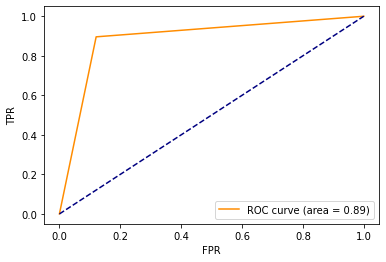

Confusion matrix:
 [[102   5]
 [ 14  43]] 

Area under curve = 0.8875718390804598


In [274]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()

print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

Conclusion:
    
1) Logistic Regression:

    f1 score: 0.87
    diff between CV score and f1 score: 0.0768
    AUC: 0.87
    
2) Decision tree classifier:

    f1 score: 0.82
    diff between CV score and f1 score: 0.018
    AUC: 0.85
    
3) SVC:

    f1 score: 0.85
    diff between CV score and f1 score: 0.041
    AUC: 0.85
    
4) KNN classifier:

    f1 score: 0.87
    diff between CV score and f1 score: 0.052
    AUC: 0.895
    
5) Adaboost classifier:

    f1 score: 0.878
    diff between CV score and f1 score: 0.088
    AUC: 0.88
    
6) Random forest classifier:

    f1 score: 0.88
    diff between CV score and f1 score: 0.057
    AUC: 0.89
 
Considering difference between CV score and f1 score of testing (accuracy of test): ranges between 0.018 to 0.088

Considering better confusion matrix as evaluation metric i.e, AUC : ranges from 0.85 to 0.895

Considering both of above 2 factors into account KNN classifier is giving best performance

In [276]:
model = KNeighborsClassifier(leaf_size=25, n_neighbors=6)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 82.93%
Accuracy score of test is : 87.80% 

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       107
           1       0.93      0.70      0.80        57

    accuracy                           0.88       164
   macro avg       0.89      0.84      0.86       164
weighted avg       0.88      0.88      0.87       164



In [277]:
ypr = model.predict(xt) 
print('Accuracy score:',accuracy_score(yt, ypr),'\n')

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean())

Accuracy score: 0.8780487804878049 

At CV = 2
CV score = 0.7878048780487805
At CV = 3
CV score = 0.7975945384704509
At CV = 4
CV score = 0.8146341463414634
At CV = 5
CV score = 0.8134146341463415
At CV = 6
CV score = 0.8109972091026192
At CV = 7
CV score = 0.8158771548602056
At CV = 8
CV score = 0.8159028174376546
At CV = 9
CV score = 0.8256357169400647
At CV = 10
CV score = 0.8170731707317074


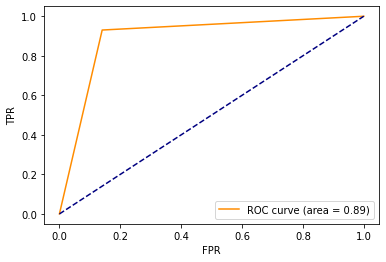

Confusion matrix:
 [[104   3]
 [ 17  40]] 

Area under curve = 0.8948683451854699


In [278]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()

print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

In [289]:
table = pd.DataFrame()
table['Actually Survival'] = yt
table['Predicted Survival'] = ypr
table.sample(10)

,Actually Survival,Predicted Survival
607,1,0
693,0,0
210,0,0
739,0,0
300,1,1
353,0,0
738,0,0
275,1,1
806,0,0
131,0,0


In [290]:
import pickle
filename='titanic.pkl'
pickle.dump(model,open(filename,'wb'))